# Module 6 Project
**Melissa Stone Rogers, June 3, 2024**

This is a professional project to create an exploratory data analysis (EDA) project using GitHub, Git, Jupyter, pandas, Seaborn and other popular data analytics tools.

Commands were used on a Mac machine running zsh. 

## Import Dependencies

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa

## Data Acquisition

In [14]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df = sns.load_dataset('flights')

# Inspect first rows of the DataFrame
print(df.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


## Initial Data Inspection

In [15]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
8  1949   Sep         136
9  1949   Oct         119
(144, 3)
year             int64
month         category
passengers       int64
dtype: object


## Initial Descriptive Statistics

In [16]:
print(df.describe())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


## Initial Data Distribution for Numerical Columns

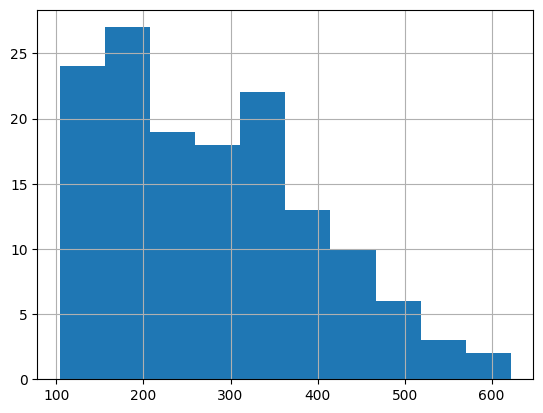

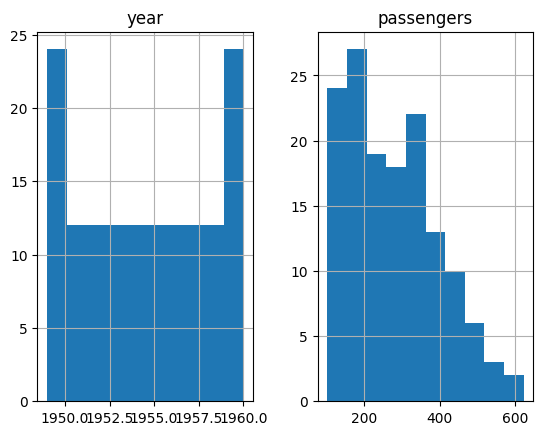

In [17]:
# Inspect histogram by numerical column
df['passengers'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

**Histogram of Years:** The graph on the left displays the frequency that flights occured in certain years from the flights dataset. The dataset provided data from 1949-1960. The graph on the left shows a higher frequency of flights occured in the years 1949 and 1950, and then also in 1958-1960. The middle years had about 12 flights occur per year. 

**Histogram of Flights:** The graph on the right displays the frequency the flights would carry a certain number of passengers. This graph shows the majority of flights carried between approximately 100 and 300 passengers. Flights with approximately 400-600 passengers were less common. 

## Initial Data Distribution for Categorical Columns 

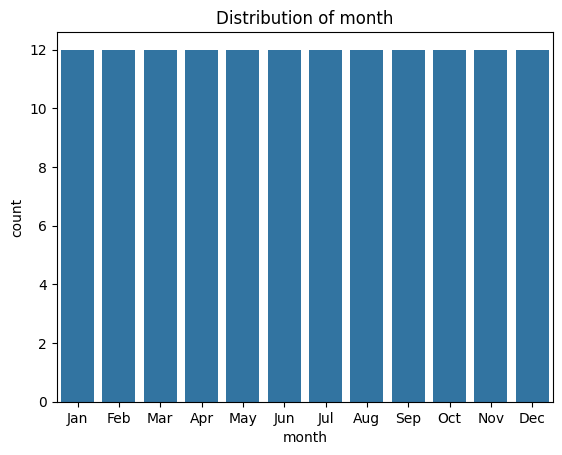

In [18]:
# Inspect value counts by categorical column
df['month'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

**Distribution of Flights By Month**: The above graph shows of the data represented an even number of flights occurred each month in overall. Over the years, each month had 12 flights take place within that month. 

## Initial Data Transformation and Feature Engineering

In [25]:
# Rename the column
flights.rename(columns={'passengers': 'customers'}, inplace=True)


# Add new column and calculate the cumulative sum of customers
flights['cumulative_customers'] = flights['customers'].cumsum()


# Print transformations
print(flights.head())

# Print column names
print(flights.columns)

   year month  customers  cumulative_customers
0  1949   Jan        112                   112
1  1949   Feb        118                   230
2  1949   Mar        132                   362
3  1949   Apr        129                   491
4  1949   May        121                   612
Index(['year', 'month', 'customers', 'cumulative_customers'], dtype='object')


Here, the column "passengers" was renamed to "customers. Additionally, I created another column to show the cumulative sum of customers throughout the dataset. 

## Initial Visualizations 

### Initial Visualizations, Part 1

First, I was curious if there were any outliers within the data regarding the number of customers. I will use a box-plot to show the distribution of data. 

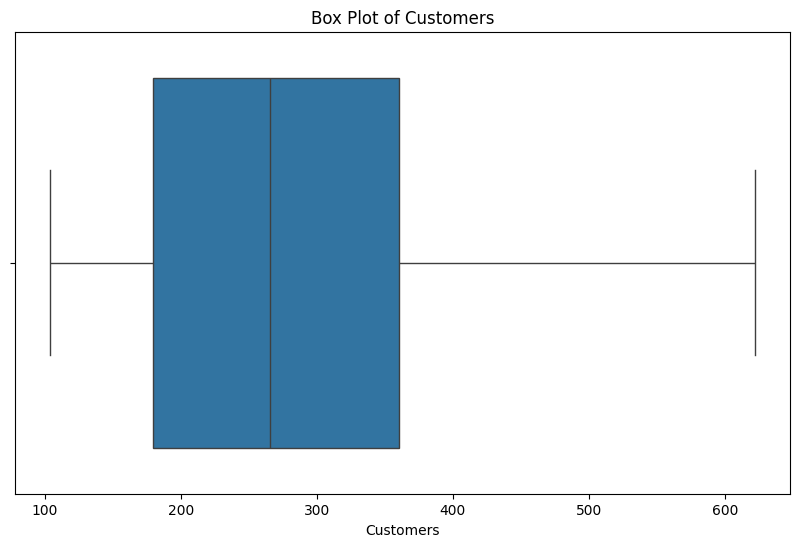

In [31]:
# Create a box plot to depict outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=flights['customers'])

# Set the title and labels
plt.title('Box Plot of Customers')
plt.xlabel('Customers')

# Show the plot
plt.show()

**Initial Visualizations Discussion, Part 1**

This graph shows the medium number of customers was roughly 275 within a month. The lowest was 100, and highest being above 600. To more fully understand the distribution of these numbers,I will view how the number of customers changed overtime next. 

### Initial Visualizations, Part 2
Next, I am curious how the number of customers change over time. I will use a line plot to show the number of customers (y-axis) over the years represented (x-axis).

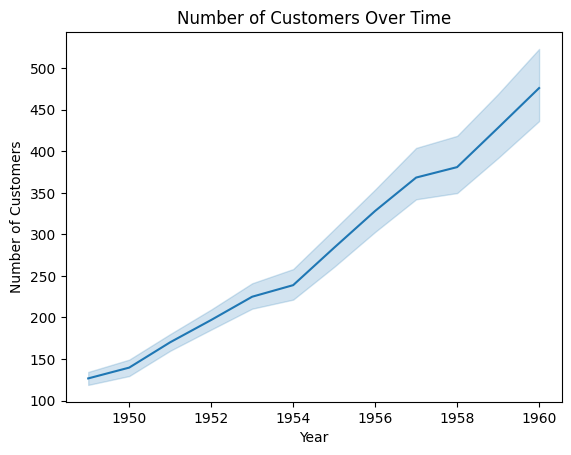

In [32]:
# Create a line plot
sns.lineplot(data=flights, x='year', y='customers')

# Set the title and labels
plt.title('Number of Customers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

**Initial Visualizations Discussion, Part 2**

Within the plot graph, you can see the number of customers utlizing flights increase from approximately 125 to over 500 customers in the year 1960. This could be due to advancements within the airline indiustry, allowing for more flights to occur, and also, the airline industry becoming more accessible to the average person. 

### Initial Visualizations, Part 3

Last, I wanted to view the number of customers by month to draw potential conclusions of when most people travel. For this question, I will use a bar graph to show the number of customers that traveled in each month. The months will by the x-axis and the number of customers will be the y-axis.

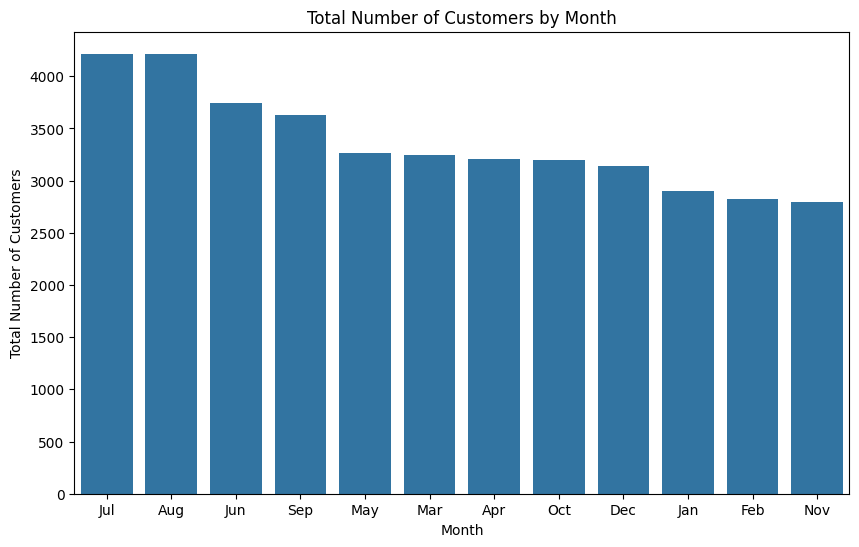

In [33]:
# Calculate the total number of customers for each month
total_customers_by_month = flights.groupby('month', observed=True)['customers'].sum().reset_index()

# Sort the data by total customers in descending order
total_customers_by_month = total_customers_by_month.sort_values(by='customers', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_customers_by_month, x='month', y='customers', order=total_customers_by_month['month'])

# Set the title and labels
plt.title('Total Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Customers')

# Show the plot
plt.show()


**Initial Visualizations Discussion, Part 3**

This bar graph shows the total number of customers that traveled within a certain month. The most number of customers occurred in July and August. This could indicate people traveling more often in the summer months, which is a typical time for indiviudals to take vacation. The least number of customers occured in November-February. This could be due to less traveling happening during the winter months, when there is more poor weather conditions, resulting in people choosing to not fly. 